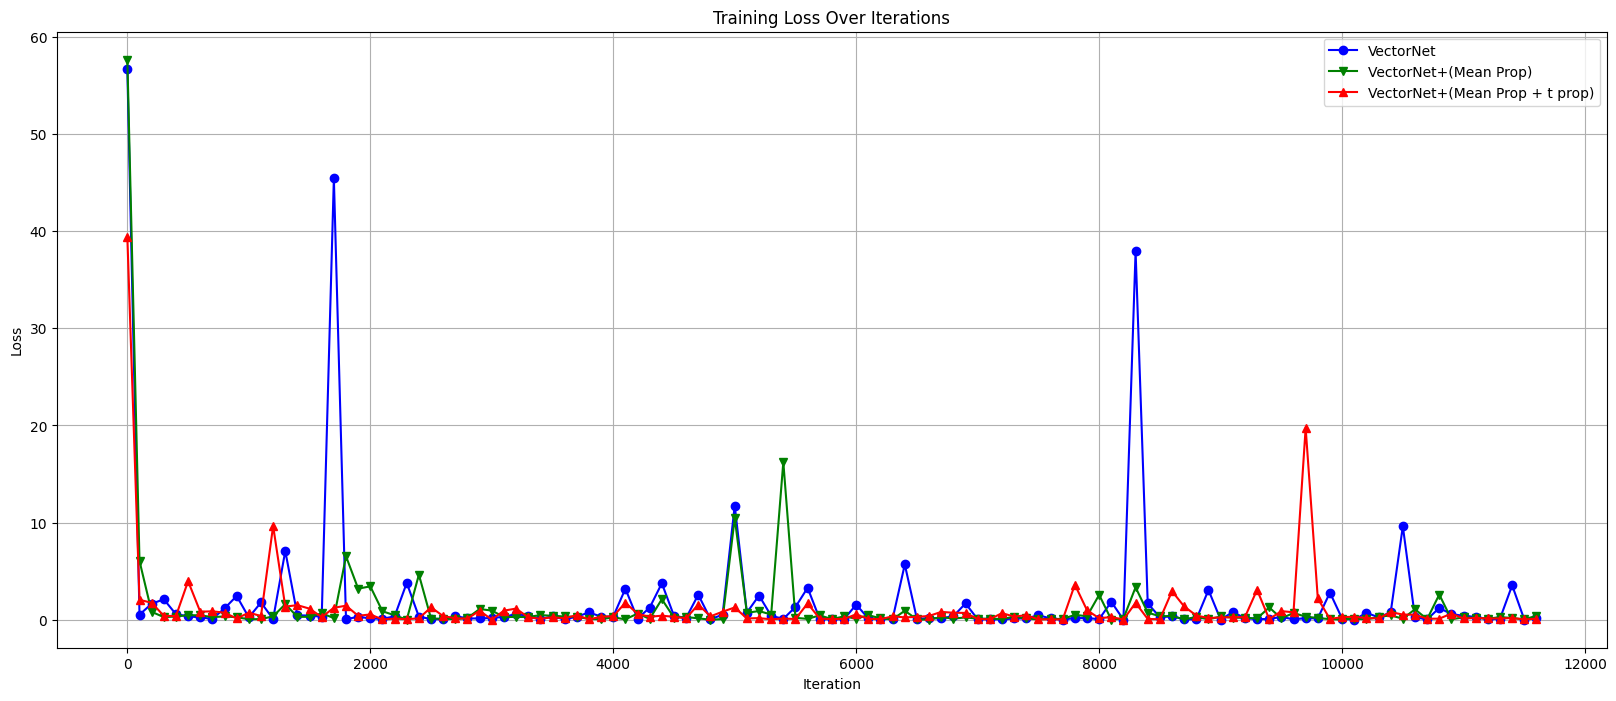

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def parse_log_file(log_file_path):
    """ 解析日志文件，提取loss值 """
    losses = []
    with open(log_file_path, 'r') as file:
        for line in file:
            if "loss =" in line:
                # 提取loss值并转换为浮点数
                loss_value = float(line.split("loss =")[-1].strip())
                losses.append(loss_value)
    return losses

def plot_losses(log_files, file_names):
    """ 绘制多个日志文件的loss折线图 """
    plt.figure(figsize=(20, 8))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 不同文件使用不同颜色
    markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']  # 不同文件使用不同标记

    for index, log_file in enumerate(log_files):
        losses = parse_log_file(log_file)
        iterations = np.arange(len(losses)) * 100  # 生成一个等长的迭代次数数组，并将每个元素乘以100
        plt.plot(iterations, losses, marker=markers[index % len(markers)], linestyle='-', color=colors[index % len(colors)], label=file_names[index])

    plt.title("Training Loss Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()  # 显示图例
    plt.show()

# 使用多个日志文件的路径
log_files = ['log1.txt', 'log2.txt', 'log3.txt']
file_names = ['VectorNet', 'VectorNet+(Mean Prop)', 'VectorNet+(Mean Prop + t prop)']  # 确保这里的路径指向你的日志文件

# 绘制多个日志文件的loss折线图
plot_losses(log_files, file_names)
